In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
ansur_df = pd.read_csv("../dados/ansur_df.csv")

In [8]:
ansur_df = ansur_df.select_dtypes(include=["int"])

In [9]:
ansur_df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  ...  trochanterionheight  verticaltrunkcircumferenceusa  \
0               274  ...                  919                           1700   
1               257  ...                  918                           1627   
2               261  ...                  918                           1678   
3               262  ...                  847                           1625   
4               263  ...                 1090                           1679   

   waistbacklength  waistbreadth  waistcircumference  waistdepth  \
0              501           329                 933         240   
1              432           316                 870         225   
2              472           329                 964         255   
3              461           315                 857         205   
4              467           303                 868         214   

   waistfrontlengthsitting  waistheightomphalion  wristcircumference  \
0                      440                  1054                 175   
1                      371                  1054                 167   
2                      411                  1041                 180   
3                      399                   968                 176   
4                      379                  1245                 188   

   wristheight  
0          853  
1          815  
2          831  
3          793  
4          954  

[5 rows x 91 columns]

<AxesSubplot:xlabel='handlength', ylabel='footlength'>

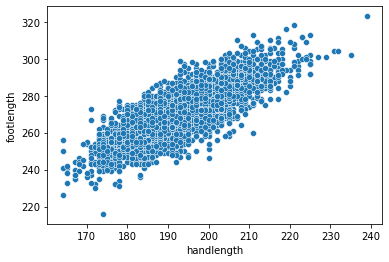

In [5]:
sns.scatterplot(data=ansur, x='handlength', y='footlength')

# O método mais famoso de extração de variáveis é o Principal Component Analysis(PCA), ele cria variáveis novas a partir das variáveis originais. Essas novas variáveis são combinações lineares das variáveis originais e que são não correlacionadas entre si. A soma da variância de todas as variáveis criadas  é exatamente igual a soma da variância das variáveis originais. assim preservando a informação presente.

### Variáveis originais:
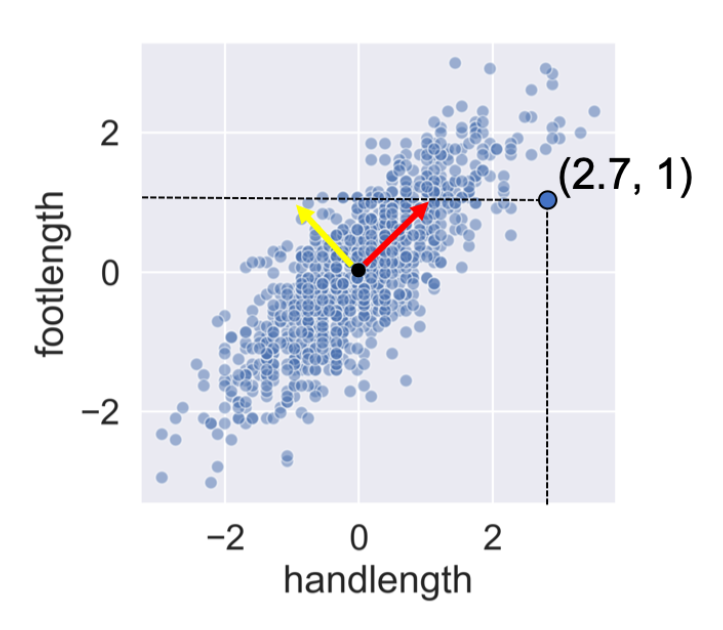

### Variáveis criadas:
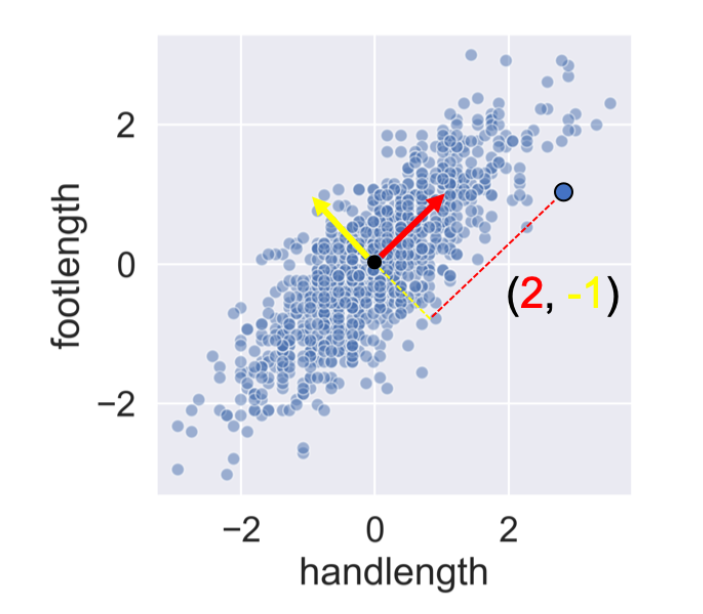

## Um ponto importante é que as variáveis originais estejam na mesma escala para melhorar a performance do PCA.

In [13]:
scaler = StandardScaler()
std_df = scaler.fit_transform(ansur_df)

In [15]:
pca = PCA()
pca_ansur = pca.fit_transform(std_df)
print(pca_ansur.shape)

[[ 1.81258106e-01  1.29826127e+00 -1.41315700e+00 ... -1.32628985e-01
  -1.21510871e-01 -6.51813615e-02]
 [ 5.24107205e+00  1.43054810e+00  7.13576532e-01 ... -2.11105596e-01
  -5.23862351e-02  6.32442220e-02]
 [-2.52695510e+00 -1.64266127e+00  1.56131064e+00 ... -9.07987126e-02
  -5.28171852e-03 -3.64335438e-02]
 ...
 [ 4.72078106e+00 -3.34715935e+00 -7.91042747e-01 ...  1.06618838e-01
  -6.87237214e-02  2.00893122e-02]
 [ 4.65179654e+00  1.90686716e+00  1.02092775e+00 ... -7.74709909e-02
  -6.75788419e-02  6.46994629e-02]
 [-9.43784876e+00  1.48775009e+00  3.50000314e+00 ...  2.31376568e-02
   1.26312744e-02  2.15728872e-02]]


## A grande sacada do PCA é que podemos selecionar somente os componentes que explicam a maior parte da variância. Podemos tanto especificar o número de componentes ou o mínimo de variância que os componentes precisam guardar 

In [20]:
np.round(pca.explained_variance_ratio_, 2)

array([0.44, 0.17, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [21]:
print(pca.explained_variance_ratio_.cumsum())

[0.43665984 0.61035457 0.65259372 0.68563394 0.70892366 0.73055903
 0.74983364 0.7650099  0.77956285 0.7931809  0.80586683 0.81773102
 0.82725041 0.8366746  0.84578061 0.85431059 0.8624078  0.86982638
 0.87699816 0.88374202 0.89014552 0.89620414 0.90204308 0.90758507
 0.91292273 0.91793598 0.92258724 0.92690037 0.9310029  0.93472995
 0.93826702 0.94155691 0.94470211 0.94756462 0.95037304 0.95292486
 0.9553919  0.95777167 0.95998483 0.96209244 0.96412511 0.96605173
 0.96785861 0.96954804 0.97118921 0.97278995 0.97430961 0.97579112
 0.97724073 0.97864928 0.9799081  0.98111122 0.98225754 0.98334896
 0.98437155 0.98536659 0.98627395 0.98711679 0.98795117 0.98873008
 0.98943592 0.99013518 0.99078461 0.99141904 0.99203206 0.99257815
 0.99311228 0.99363839 0.99414828 0.99463097 0.99509596 0.99553698
 0.99594893 0.99631891 0.99668074 0.997008   0.99732543 0.99761671
 0.99789858 0.99816937 0.99843542 0.99866564 0.99888501 0.99909919
 0.99929346 0.99947639 0.99962057 0.99974441 0.99985597 0.9999

## Nesse caso, se eu quisesse no mínimo 80% da variância eu deveria escolher 11 componentes, ou especificar 0.8.

In [22]:
pca = PCA(n_components=0.8)
pca_ansur = pca.fit_transform(std_df)
print(pca_ansur.shape)

(4082, 11)


In [23]:
pca = PCA(n_components=11)
pca_ansur = pca.fit_transform(std_df)
print(pca_ansur.shape)

(4082, 11)


### Outra grande vantagem é que podemos usar o PCA em um pipeline do scikit learn e assim preservar a separação de treino e teste, assim evitando data leakage:
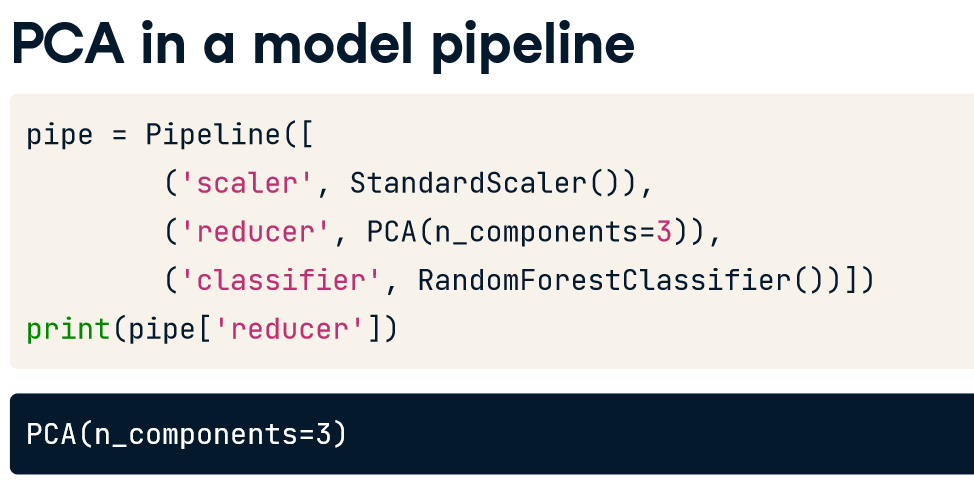